In [2]:
2

2

### The Law of Large Numbers

In [3]:
import random
random.seed(54321)

In [4]:
# Define a variable for our sample size, set it equal to 10
sample_size = 100

- Create empty list to collect the results of our coin flip experiment

In [5]:
# Here we create for loop and collect the result in a list
result_list = []

for i in range(sample_size):
    result = random.randint(0,1)
    result_list.append(result)

- Define two variables to compile the results

In [6]:
num_of_heads = sum(result_list)
avg_of_heads = float(num_of_heads) / sample_size

In [7]:
# print the results
print(f'Results: {num_of_heads} heads out of {sample_size} flips.')
print(f'Average number of heads per flip is {avg_of_heads}.')


Results: 51 heads out of 100 flips.
Average number of heads per flip is 0.51.


- Now change the size of sample to 100, and do it again!

---

### Coin Flipping Average over Time

In [8]:
import random
import matplotlib.pyplot as plt
random.seed(54321)

- Define the sample size

In [9]:
sample_size = 20000

- Initialize the variables required for our loop

In [10]:
# 1 = heads and 0 = tails
num_of_heads = 0
heads_list = []
trials_list = []
freq_list = []

- Run the simulation!

In [11]:
for i in range(1, sample_size+1):
    result = random.randint(0,1)
    if result == 1:
        num_of_heads += 1

    avg_of_heads = float(num_of_heads)/i
    heads_list.append(num_of_heads)
    trials_list.append(i)
    freq_list.append(avg_of_heads)


# Print the results
print(f'Results: {num_of_heads} heads out of {sample_size} flips.')
print(f'Average number of heads is {avg_of_heads}')

Results: 10008 heads out of 20000 flips.
Average number of heads is 0.5004


- Create the line graph, to show the sample mean over time, along with marking our expected value using a dashed line

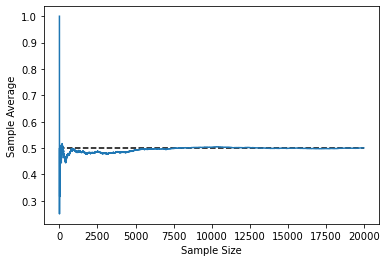

In [12]:
plt.plot(trials_list, freq_list)
plt.ylabel('Sample Average')
plt.xlabel('Sample Size')
plt.hlines(0.50,0,sample_size, linestyles='dashed')
plt.show()

---

### Calculating the Avg Winnings for a Game of Roulette If We Constantly Bet on Red

In [13]:
import random
import matplotlib.pyplot as plt
random.seed(54321)

In [14]:
# Create variable for the sample size and set it to 10, variable bet, and set it to $1

sample_size = 100
bet = 1

- Initialize the variables that we will use to collect the results of our simulation

In [15]:
net_money = 0
wins = 0
money_track = []
trials_track = []

# Run the simulation 
for i in range(1, sample_size+1):
    result = random.randint(1,38)
    if result%2==1 and result!=37:
        net_money += bet
        wins += 1
    
    else:
        net_money = bet
    
    money_track.append(net_money/i)
    trials_track.append(i)

In [16]:
print(f'Results: You won {wins} games out of{sample_size} and won an average of {net_money/sample_size} dollars per game')
print(f'Results: You are expected to win {((18/38)*bet+(20/38)*(-bet))} per game')


Results: You won 55 games out of100 and won an average of 0.01 dollars per game
Results: You are expected to win -0.05263157894736842 per game


- Create the graph of the expected value of the net chyange in money per game and the sample average of the net change in money per game

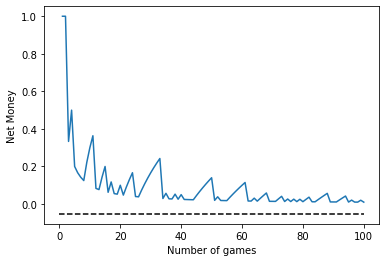

In [17]:
plt.plot(trials_track, money_track)
plt.ylabel('Net Money')
plt.xlabel('Number of games')
plt.hlines(((18/38)*bet+(20/38)*(-bet)), 0, sample_size, linestyles='dashed')
plt.show()

### Showing the Sample Mean for a Uniform Distribution

Here we will draw a random sample from a random number generator that generates random numbers between 0 and 100. Thenm we calculates the sample average

In [21]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as stats
random.seed(54321)

- Create a variable for the size of each sample and the total number of samples that you want to take. Since the CLT states that we need a sufficiently large sample, we have selected a sample size of 30. Next, we are going to need a lot of sample means to graph and have set that value equal to 10,000

In [22]:
sample_size = 30
calc_means = 10000

- Initialize the list that will be used to collect our sample means, and run through our simulation the specified number of times, collecting the sample mean of each sample

In [23]:
mean_list = []

for j in range(calc_means):
    sample_list = [] # This used to track our results
    for j in range(sample_size):
        sample_list.append(random.randint(0, 100))
    
    sample_mean = sum(sample_list)/sample_size
    mean_list.append(sample_mean)

- Create the histogram of the sample means that we collected

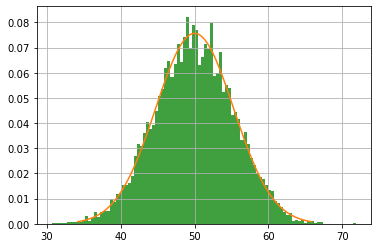

In [24]:
n, bins, patches = plt.hist(mean_list, math.floor(math.sqrt(calc_means)),density=True,facecolor='g',alpha=0.75)
plt.grid(True)

mu = 50
sigma = math.sqrt(((100 ** 2) / 12)) / (math.sqrt(sample_size))
x = np.linspace(mu -3 * sigma, mu+3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

### Taking a Sample from an Exponential Distribution

In [25]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as stats

# Create sample size
sample_size = 5
calc_means = 10000

- Initialize the variable that we will use to collect the results of our simulation. Run the simulation, but this time sample from an exponential distribution rather than a uniform distribution

In [26]:
mean_list = []

# Run the loop to collect a sample
for j in range(calc_means):
    sample_list = []
    for i in range(sample_size):
        draw = np.random.exponential(1)
        sample_list.append(draw)
    sample_mean = sum(sample_list)/sample_size
    mean_list.append(sample_mean)

- Create a histogram of the sample means we collected and overlay what the CLT says we should expect from it

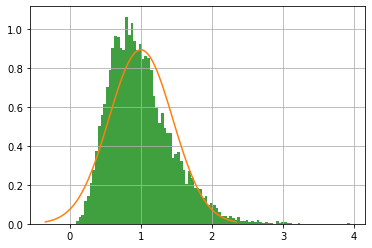

In [27]:
n, bins, patches = plt.hist(mean_list, \
                   math.floor(math.sqrt(calc_means)), \
                   density=True, facecolor='g', \
                   alpha=0.75)
plt.grid(True)
mu = 1
sigma = 1 / (math.sqrt(sample_size))
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

---

### Finding the Confidence Interval of Polling Figures

Ceritanya anda sedang menjalankan kampanye politik, di mana anda memutuskan untuk menjalankan 30 kelompok fokus dengan sekitar 10 orang di setiap kelompok. Anda mendapatkan hasilnya, dan ingin melaporkan kepada kandidat anda, jumlah orang yang akan memilih merka dalam kelompok 10 orang biasa. Karena ada bebrapa variabilitas di setiap kelompok fokus, Anda memutuskan bahwa cara yang paling akurat adalah dengan memberikan interval kepercayaan yakni 95% interval. Anda mengasumsikan dari pengalaman dengan standar deviasi 2.89.

In [28]:
import random
random.seed(39809)

- Initialize sample list, and collect our samples from our focus groups. From here, we just enter the information into our function

In [29]:
def z_confidence_interval(data, st_dev, con_lvl):
    import statistics as st
    import scipy.stats as sp
    import math
    sample_mean = st.mean(data)
    n = len(data)
    crit_value = sp.norm.ppf(((1 - con_lvl) / 2) + \
                             con_lvl)
    lower_limit = sample_mean - (crit_value * \
                                 (st_dev/math.sqrt(n)))
    higher_limit = sample_mean + (crit_value * \
                                  (st_dev / math.sqrt(n)))
    print (f'Your {con_lvl} z confidence interval is ({lower_limit}, {higher_limit})')
    return (lower_limit,higher_limit)


In [30]:
sample_list = []

for i in range(30):
    sample_list.append(random.randint(0,10))

z_confidence_interval(sample_list,2.89,0.95)

Your 0.95 z confidence interval is (3.965845784931483, 6.034154215068517)


(3.965845784931483, 6.034154215068517)

This tell us that in a typical focus group, anywhere between 4 to 6 people in each group will vote for our candidate. This signals to you that the campaign should keep working harder to convince more people to vote for your candidate

---